<a href="https://colab.research.google.com/github/cynthiiaa/DataMining/blob/main/DataMining_HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **ISL pg. 120 #12**

Given the coefficient estimate $$ \hat{\beta} $$ for the linear regression of Y onto X without an intercept:

$$
\hat{\beta} = \frac{\sum_{i=1}^{n} x_i y_i}{\sum_{i'=1}^{n} x_{i'}^2}
$$

And for regressing X onto Y:

$$
\hat{\beta}' = \frac{\sum_{i=1}^{n} x_i y_i}{\sum_{i'=1}^{n} y_{i'}^2}
$$

Under which circumstance $$ \hat{\beta} $$ and $$ \hat{\beta}' $$ are the same? They are the same when:

$$
\frac{\sum_{i=1}^{n} x_i y_i}{\sum_{i'=1}^{n} x_{i'}^2} = \frac{\sum_{i=1}^{n} x_i y_i}{\sum_{i'=1}^{n} y_{i'}^2}
$$

Essentially when:

$$
\sum_{i'=1}^{n} x_{i'}^2 = \sum_{i'=1}^{n} y_{i'}^2
$$

In [ ]:
np.random.seed(0)
x = np.random.rand(100)
y = 3 * x + np.random.randn(100)  # Y is generated as 3*X plus some random noise

beta_yx = np.sum(x * y) / np.sum(x**2)
print(f"The coefficient estimate for the regression of Y onto X is: {beta_yx:.3f}")

beta_xy = np.sum(x * y) / np.sum(y**2)
print(f"The coefficient estimate for the regression of X onto Y is: {beta_xy:.3f}")

The coefficient estimate for the regression of Y onto X is: 3.279
The coefficient estimate for the regression of X onto Y is: 0.234


In [ ]:
np.random.seed(0)
x = np.random.rand(100)
y = x  # making y equal to x

beta_yx = np.sum(x * y) / np.sum(x**2)
print(f"The coefficient estimate for the regression of Y onto X is: {beta_yx:.3f}")

beta_xy = np.sum(x * y) / np.sum(y**2)
print(f"The coefficient estimate for the regression of X onto Y is: {beta_xy:.3f}")

The coefficient estimate for the regression of Y onto X is: 1.000
The coefficient estimate for the regression of X onto Y is: 1.000


# **ISL pg. 120 #13**

Ignore these cells, it's a repeat from the prior homework.

In [ ]:
# part a
np.random.seed(1)
X = np.random.normal(0, 1, 100)

In [ ]:
# part b
variance = 0.25
mean = 0
std_dev = np.sqrt(variance)
eps = np.random.normal(mean, std_dev, 100)

In [ ]:
# part c
y = -1 + 0.5 * x + eps # model given to us
print("length of y is:", len(y))
print("β0 = -1\nβ1 = 0.5")

length of y is: 100
β0 = -1
β1 = 0.5


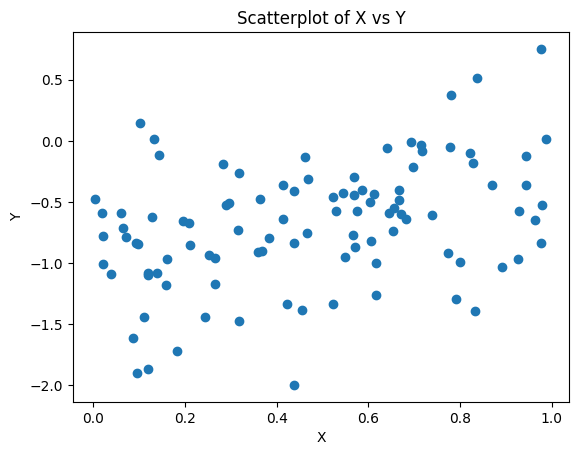

In [ ]:
# part d
plt.scatter(x, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatterplot of X vs Y")
plt.show()

In [ ]:
# part e
import statsmodels.api as sm

X = sm.add_constant(x)
model = sm.OLS(y, X).fit()

beta_hat_0 = model.params[0]  # intercept
beta_hat_1 = model.params[1]  # slope

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     16.39
Date:                Mon, 02 Oct 2023   Prob (F-statistic):           0.000103
Time:                        00:29:29   Log-Likelihood:                -65.057
No. Observations:                 100   AIC:                             134.1
Df Residuals:                      98   BIC:                             139.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9983      0.090    -11.094      0.0

β0_hat is not so close to β0. For my model β0_hat is -0.9265 but β0 = 1.

β1_hat is a little off from β1. For my model β1_hat is 0.5477 but β1 is 0.5

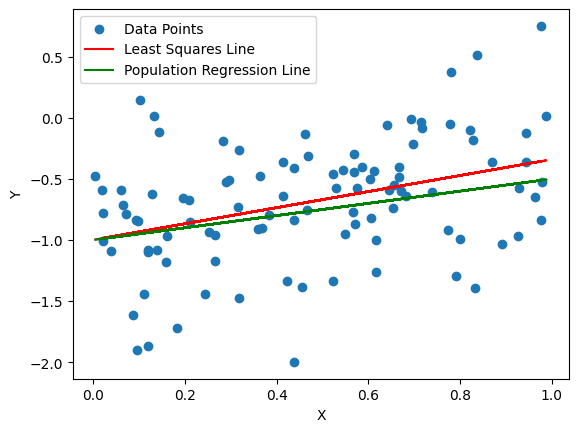

In [ ]:
plt.scatter(x, y, label='Data Points')
plt.xlabel("X")
plt.ylabel("Y")

# fitted line
y_hat = beta_hat_0 + beta_hat_1 * x
plt.plot(x, y_hat, color='red', label='Least Squares Line')

# Population Regression Line
y_pop = -1 + 0.5 * x
plt.plot(x, y_pop, color='green', label='Population Regression Line')


plt.legend()
plt.show()

# **ISL pg. 120 #14**

In [ ]:
np.random.seed(1)

x1 = np.random.rand(100)
x2 = 0.5 * x1 + np.random.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + np.random.normal(size=100)

# fitting linear model
X = sm.add_constant(np.column_stack((x1, x2)))
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     17.09
Date:                Mon, 02 Oct 2023   Prob (F-statistic):           4.40e-07
Time:                        00:29:29   Log-Likelihood:                -142.34
No. Observations:                 100   AIC:                             290.7
Df Residuals:                      97   BIC:                             298.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1893      0.199     11.021      0.0

### Part A:

The form of the linear model is: $$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \epsilon $$

β0​,β1​,β2​ are the regression coefficients

The correlation between x1 and x2 is: 0.8391


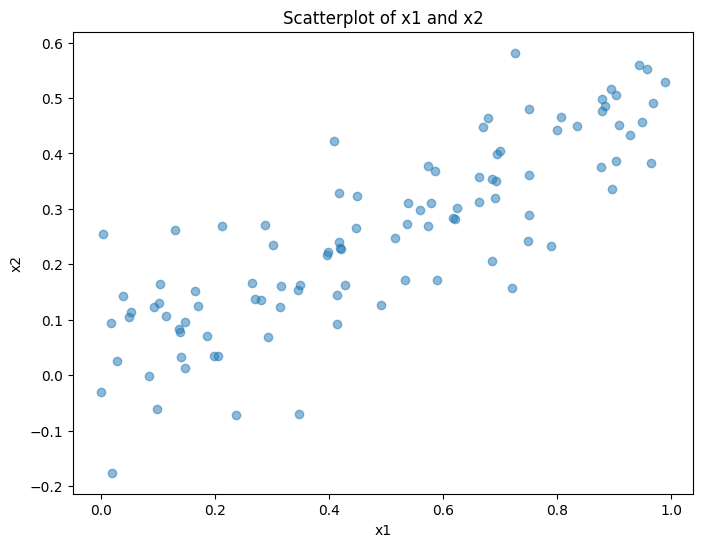

In [ ]:
# part b
from scipy.stats import pearsonr

# find r
r, _ = pearsonr(x1, x2)
print(f"The correlation between x1 and x2 is: {r:.4f}")

# plot the scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(x1, x2, alpha=0.5)
plt.title("Scatterplot of x1 and x2")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

### Part C:

I'm confused on Part C, since there is no new data to fit the model on (if I continue to use the same seed).

β0​,β1​,β2​ would be exactly the same as in Part A.

The p-value for β2 is  0.031, so we can reject the null hypothesis. However, the p-value for β1 is 0.271 so we fail to reject that null hypothesis.

### Part D:

When using only x1, the p-value of β1 is 0.000 which is statistically significant so we can reject the null hypothesis in this case.

In [ ]:
# linear model with only x1
X = sm.add_constant(x1)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     28.26
Date:                Mon, 02 Oct 2023   Prob (F-statistic):           6.68e-07
Time:                        00:29:30   Log-Likelihood:                -144.76
No. Observations:                 100   AIC:                             293.5
Df Residuals:                      98   BIC:                             298.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2486      0.201     11.209      0.0

### Part E:

When using only x2, the p-value for β2 is 0.000 which is statistically significant so we can reject the null hypothesis in this case.

But this is suspect to me.

In [ ]:
# linear model with only x2
X = sm.add_constant(x2)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     32.87
Date:                Mon, 02 Oct 2023   Prob (F-statistic):           1.09e-07
Time:                        00:29:30   Log-Likelihood:                -142.97
No. Observations:                 100   AIC:                             289.9
Df Residuals:                      98   BIC:                             295.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2655      0.187     12.145      0.0

### Part F:
1. Model with only x1 as a predictor:

    β1^​ for x1 = 1.8770
    P-value for x1 = very close to 0 (<0.05), which means x1 is a significant predictor for y when alone.
    R-squared = 0.224

2. Model with only x2 as a predictor:

    β1^​ for x2 = 3.5613
    P-value for x2 = very close to 0 (<0.05), which means x2 is also a significant predictor for y when alone.
    R-squared = 0.251

3. Model with both x1 and x2 as predictors:

    β1^​ for x1 = 0.7046 and P-value = 0.271 (>0.05)
    β2^​ for x2 = 2.5024 and P-value = 0.031 (<0.05)
    R-squared = 0.261

The coefficient of x1 is not statistically significant when both predictors are included, but it is significant when x1 is alone. This indicates multicollinearity.

The R^2 value only slightly increases when both x1 and x2 are in the model compared to the models with the single predictors. This slight increase means that adding both predictors together doesn't add a lot of new insight.

### Part G:

The residual for the model using x1 as the predictor is large when looking at the new observation. The new observation is an outlier. For the model using only x2 and the model using both x1 and x2, the new observation is not an outlier.

In [ ]:
# part g
x1 = np.append(x1, 0.1)
x2 = np.append(x2, 0.8)
y = np.append(y, 6)

# refit the models -- using only x1
print("Using only x1")
X = sm.add_constant(x1)
model_x1 = sm.OLS(y, X).fit()
print(model_x1.summary())

# refit the model -- using only x2
print("\nUsing only x2")
X = sm.add_constant(x2)
model_x2 = sm.OLS(y, X).fit()
print(model_x2.summary())

# refit the model-- uisng x1 and x2
print("\nUsing x1 and x2")
X = np.column_stack((x1, x2))
X = sm.add_constant(X)
model_x1_x2 = sm.OLS(y, X).fit()
print(model_x1_x2.summary())

Using only x1
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     21.89
Date:                Mon, 02 Oct 2023   Prob (F-statistic):           9.15e-06
Time:                        00:29:30   Log-Likelihood:                -151.28
No. Observations:                 101   AIC:                             306.6
Df Residuals:                      99   BIC:                             311.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3583      0.208     1

In [ ]:
# x1 model
X1 = sm.add_constant(x1)
model_x1 = sm.OLS(y, X1).fit()
residuals_x1 = model_x1.resid
residual_new_obs_x1 = residuals_x1[-1] # since new observation is added at the end
print(f"The residual for the new observation in the model with x1 as predictor is: {residual_new_obs_x1:.2f}")

# x2 model
X2 = sm.add_constant(x2)
model_x2 = sm.OLS(y, X2).fit()
residuals_x2 = model_x2.resid
residual_new_obs_x2 = residuals_x2[-1]
print(f"The residual for the new observation in the model with x2 as predictor is: {residual_new_obs_x2:.2f}")

# x1 and x2 model
X1_X2 = sm.add_constant(list(zip(x1, x2)))
model_x1_x2 = sm.OLS(y, X1_X2).fit()
residuals_x1_x2 = model_x1_x2.resid
residual_new_obs_x1_x2 = residuals_x1_x2[-1]
print(f"The residual for the new observation in the model with x1 and x2 as predictors is: {residual_new_obs_x1_x2:.2f}")

The residual for the new observation in the model with x1 as predictor is: 3.47
The residual for the new observation in the model with x2 as predictor is: 0.79
The residual for the new observation in the model with x1 and x2 as predictors is: 1.03


In [ ]:
# calculate the RSE for each model
rse_x1 = np.sqrt(np.sum(residuals_x1 ** 2) / (len(residuals_x1) - 2))
rse_x2 = np.sqrt(np.sum(residuals_x2 ** 2) / (len(residuals_x2) - 2))
rse_x1_x2 = np.sqrt(np.sum(residuals_x1_x2 ** 2) / (len(residuals_x1_x2) - 3))

print(f"The RSE for the model with x1 as predictor is: {rse_x1:.2f}")
print(f"The RSE for the model with x2 as predictor is: {rse_x2:.2f}")
print(f"The RSE for the model with x1 and x2 as predictors is: {rse_x1_x2:.2f}")

# compare residuals of the new observation with the RSE
threshold = 2 # a residual is large if it's twice the RSE
print(f"Is the residual for the new observation in the x1 model large? {'Yes' if abs(residual_new_obs_x1) > threshold * rse_x1 else 'No'}")
print(f"Is the residual for the new observation in the x2 model large? {'Yes' if abs(residual_new_obs_x2) > threshold * rse_x2 else 'No'}")
print(f"Is the residual for the new observation in the x1 and x2 model large? {'Yes' if abs(residual_new_obs_x1_x2) > threshold * rse_x1_x2 else 'No'}")

The RSE for the model with x1 as predictor is: 1.09
The RSE for the model with x2 as predictor is: 1.02
The RSE for the model with x1 and x2 as predictors is: 1.02
Is the residual for the new observation in the x1 model large? Yes
Is the residual for the new observation in the x2 model large? No
Is the residual for the new observation in the x1 and x2 model large? No


#### Looking at leverage-points in x1

In [ ]:
# leverage statistics for x1 model
influence_x1 = model_x1.get_influence()
leverage_x1 = influence_x1.hat_matrix_diag
threshold = 2 * (X1.shape[1]) / len(x1)
high_leverage_points_x1 = np.where(leverage_x1 > threshold)

print(high_leverage_points_x1)

(array([], dtype=int64),)


#### Looking at leverage-points in x2

There are 7 high-leverage points.

In [ ]:
# leverage statistics for x2 model
influence_x2 = model_x2.get_influence()
leverage_x2 = influence_x2.hat_matrix_diag
threshold = 2 * (X2.shape[1]) / len(x2)
high_leverage_points_x2 = np.where(leverage_x2 > threshold)

print(high_leverage_points_x2)

(array([ 30,  50,  68,  77,  79,  95, 100]),)


#### Looking at leverage-points in x1_x2 model
There are 4 high-leverage points.

In [ ]:
# leverage statistics for x1_x2 model
influence_x1_x2 = model_x1_x2.get_influence()
leverage_x1_x2 = influence_x1_x2.hat_matrix_diag
threshold = 2 * (X1_X2.shape[1]) / len(x2)
high_leverage_points_x1_x2 = np.where(leverage_x1_x2 > threshold)

print(high_leverage_points_x1_x2)

(array([ 50,  77,  98, 100]),)


In [ ]:
# # removing the high-leverage points
# X1_new = np.delete(X1, high_leverage_points_x1, axis=0)
# # X2_new = np.delete(X2, high_leverage_points_x2, axis=0)
# # X1_X2_new = np.delete(X1_X2, high_leverage_points_x1_x2, axis=0)

# print("X1_new")
# model_x1_new = sm.OLS(y, X1_new).fit()
# print(model_x1_new.summary())

Things to note:

* A point with a large residual is an outlier in the response, Y.
  * doesn't affect the regression line
  * is a result from poor model predictions
* A point with high leverage is an outlier in the predictor, X.
  * can affect the regression line by negatively impacting the regression coefficients